# **House Sales in USA Between May 2014-May 2015**


## **Import the required libraries**


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
%matplotlib inline

# Importing Data Sets


In [2]:
URL='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'

In [3]:
df = pd.read_csv(URL)
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Data Wrangling


First we drop Unnamed: 0 and id Column from our DataFrame
Beacuse we dont need them for our further analysis.

In [4]:
df.drop(columns=['Unnamed: 0','id'],inplace=True)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Check for Missing values

In [5]:
df.isnull().sum()

,0
date,0
price,0
bedrooms,13
bathrooms,10
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0
condition,0


We can see we have missing values for the columns 'bedrooms'and bathrooms 13 and 10 respectively

In [6]:
df[['bedrooms','bathrooms']].dtypes

,0
bedrooms,float64
bathrooms,float64


As we see both columns contain numeric values and thier dtype is float.

So we can calculate their mean and replace it with missing values.

In [7]:
for col in df[['bedrooms','bathrooms']]:
    df[col]=df[col].replace(np.nan,df[col].mean())

df.isnull().sum()

,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0
condition,0


In [8]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926378,0.768818,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Exploratory Data Analysis


Check for the dtype of columns

In [9]:
df.dtypes

,0
date,object
price,float64
bedrooms,float64
bathrooms,float64
sqft_living,int64
sqft_lot,int64
floors,float64
waterfront,int64
view,int64
condition,int64


In [10]:
for col in df[['bedrooms','bathrooms','floors','waterfront']]:
    print(df[col].value_counts())


bedrooms
3.00000     9824
4.00000     6882
2.00000     2760
5.00000     1601
6.00000      272
1.00000      199
7.00000       38
3.37287       13
8.00000       13
9.00000        6
10.00000       3
11.00000       1
33.00000       1
Name: count, dtype: int64
bathrooms
2.500000    5380
1.000000    3852
1.750000    3048
2.250000    2047
2.000000    1930
1.500000    1446
2.750000    1185
3.000000     753
3.500000     731
3.250000     589
3.750000     155
4.000000     136
4.500000     100
4.250000      79
0.750000      72
4.750000      23
5.000000      21
5.250000      13
2.115736      10
5.500000      10
1.250000       9
6.000000       6
0.500000       4
5.750000       4
6.750000       2
8.000000       2
6.500000       2
6.250000       2
7.750000       1
7.500000       1
Name: count, dtype: int64
floors
1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: count, dtype: int64
waterfront
0    21450
1      163
Name: count, dtype: int64


We visualy check floors and waterfront columns with price

<Axes: xlabel='floors', ylabel='price'>

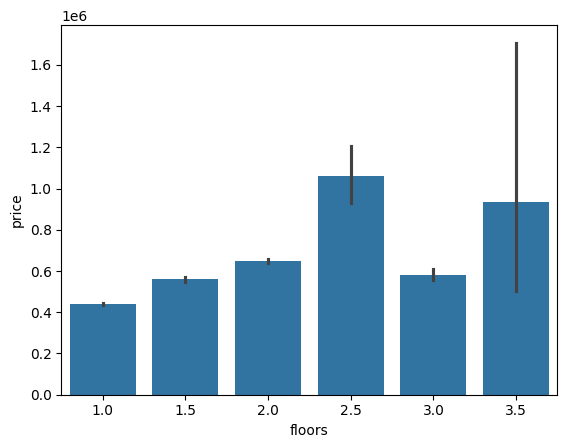

In [11]:
sns.barplot(x='floors',y='price',data=df)

<Axes: xlabel='waterfront', ylabel='price'>

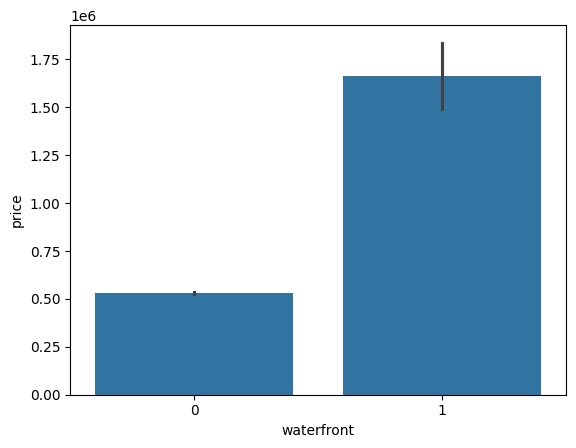

In [12]:
sns.barplot(x='waterfront',y='price',data=df)

In [13]:
numeric_data=df.select_dtypes(include=[int,float])
numeric_data.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308797,0.525738,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.308797,1.000000,0.514194,0.578077,0.032307,0.178022,-0.006800,0.080058,0.026690,0.356589,0.479286,0.302856,0.155749,0.018456,-0.153736,-0.009735,0.130978,0.393356,0.030430
bathrooms,0.525738,0.514194,1.000000,0.755371,0.087929,0.502132,0.063744,0.188341,-0.126197,0.664676,0.686309,0.283428,0.506913,0.050560,-0.204819,0.024246,0.224922,0.569467,0.087539
sqft_living,0.702035,0.578077,0.755371,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089661,0.032307,0.087929,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.256794,0.178022,0.502132,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266369,-0.006800,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.397293,0.080058,0.188341,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.036362,0.026690,-0.126197,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667434,0.356589,0.664676,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248


(0.0, 8081250.0)

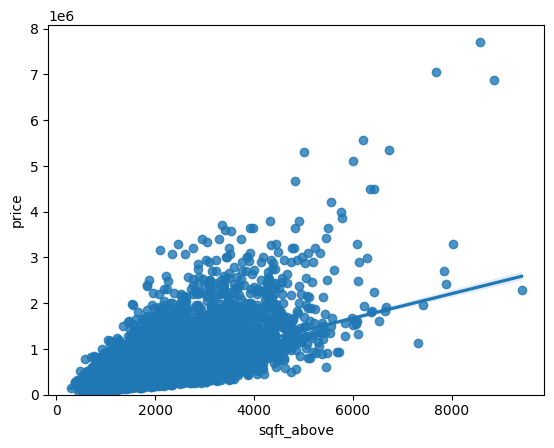

In [14]:
#Enter Your Code, Execute and take the Screenshot
sns.regplot(x="sqft_above",y="price",data=df)
plt.ylim(0,)

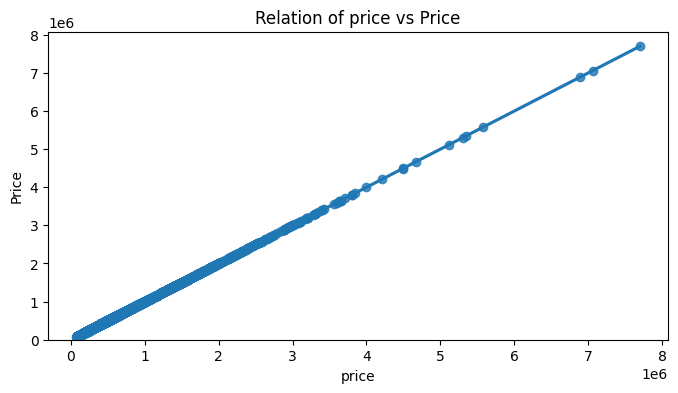

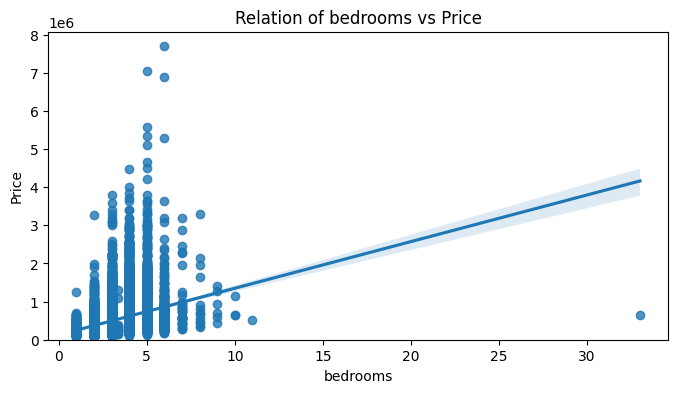

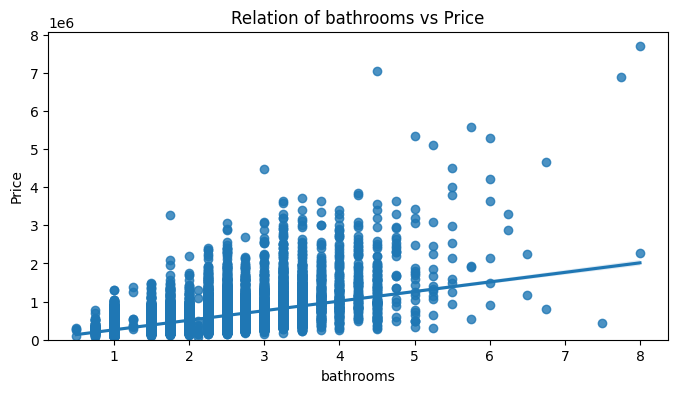

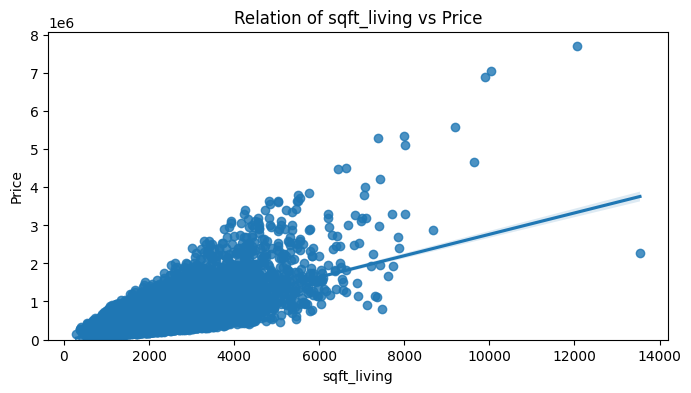

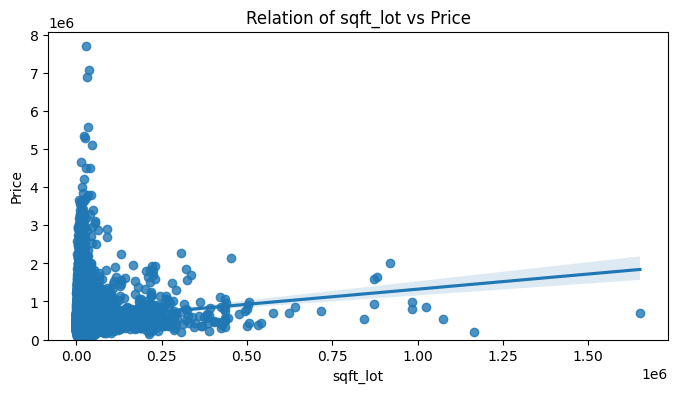

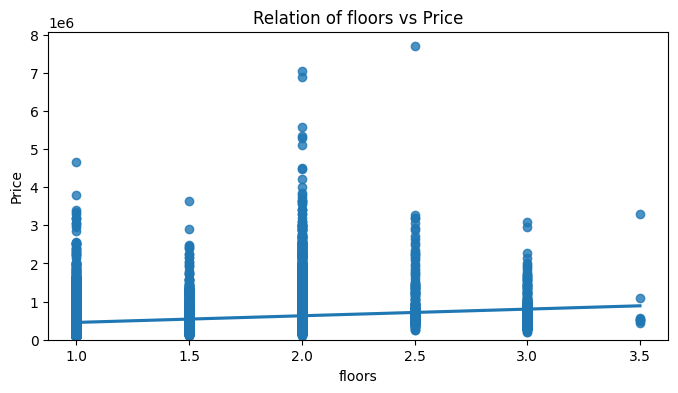

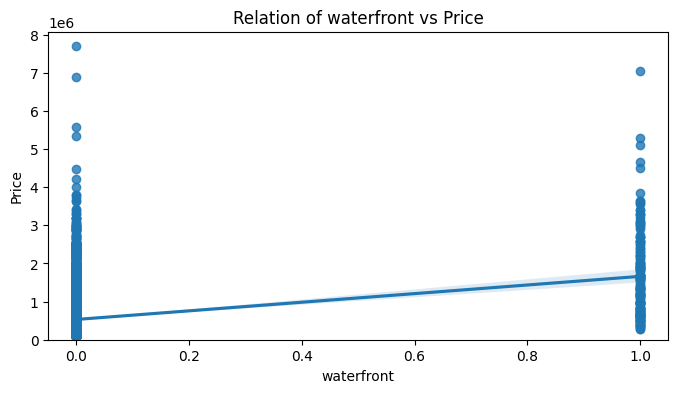

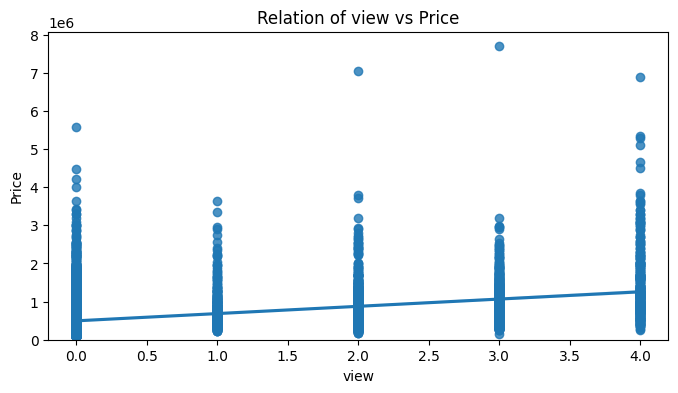

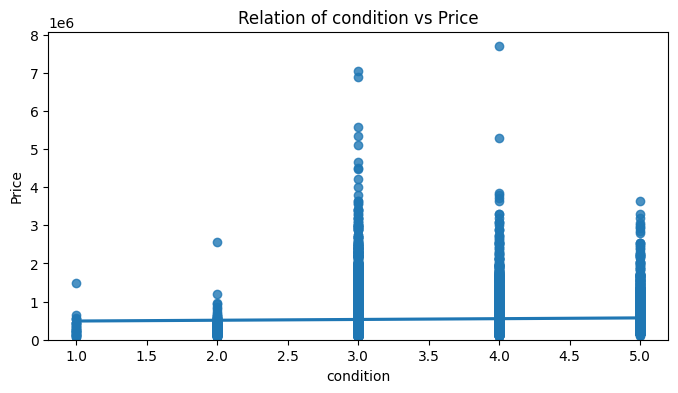

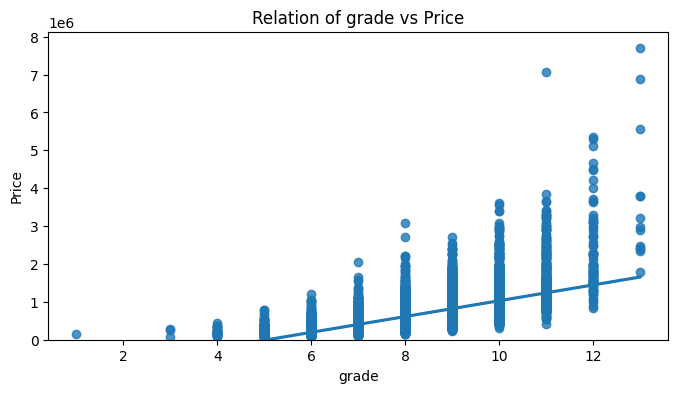

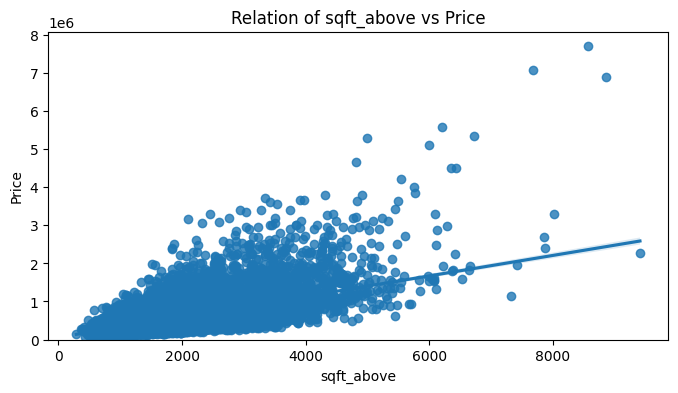

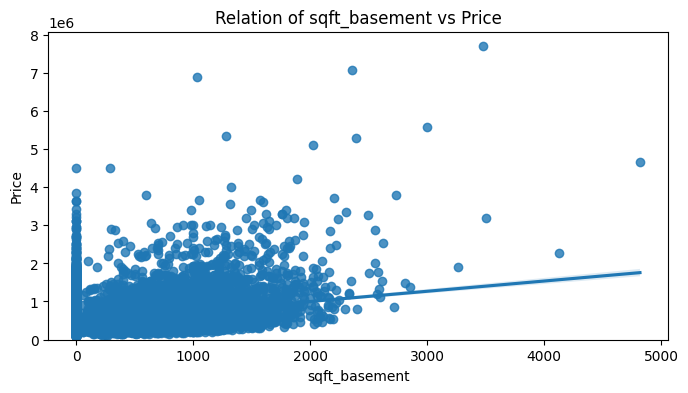

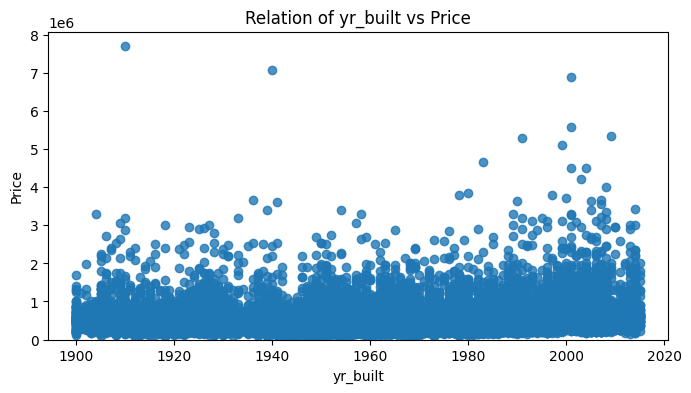

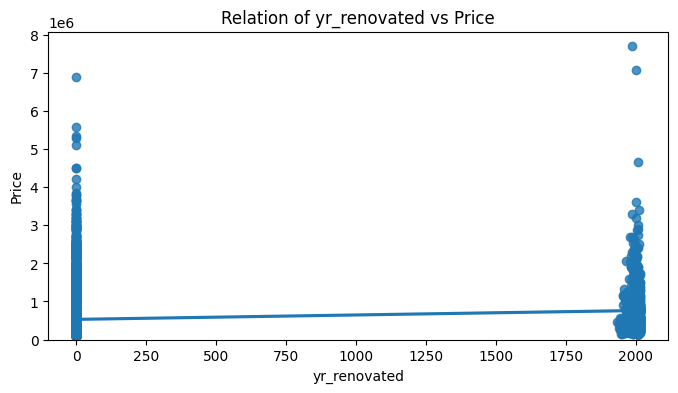

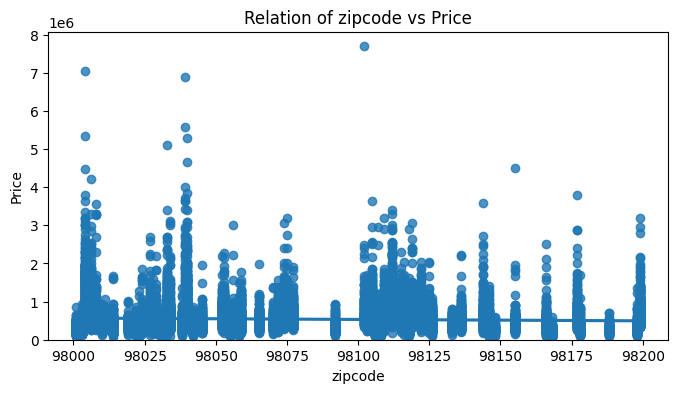

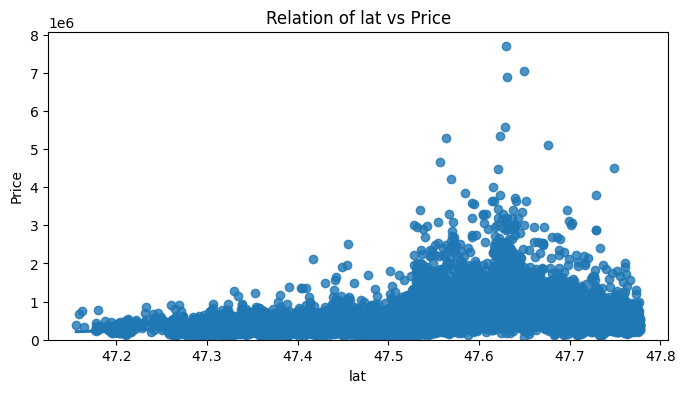

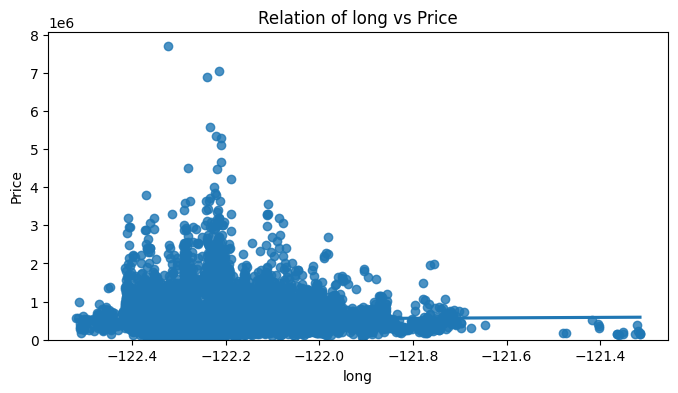

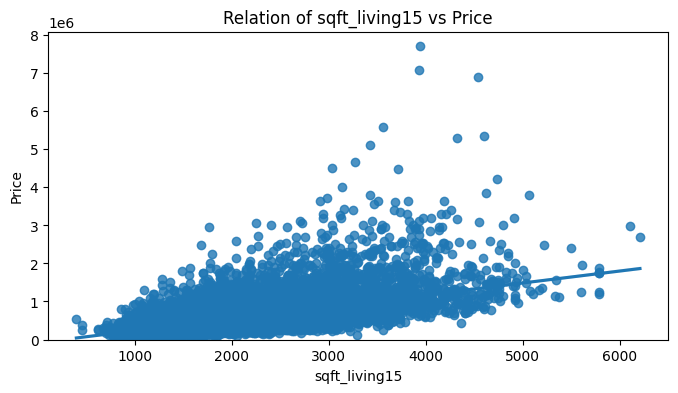

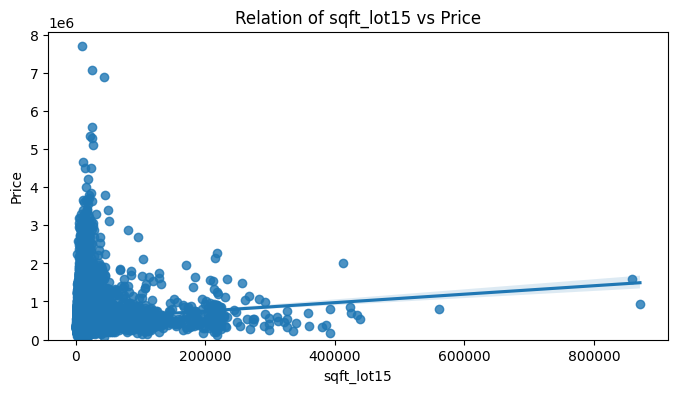

In [15]:
for col in numeric_data.columns:
  plt.figure(figsize=(8,4))
  sns.regplot(x=col,y='price',data=numeric_data)
  plt.ylim(0,)
  plt.xlabel(col)
  plt.ylabel('Price')
  plt.title(f'Relation of {col} vs Price' )


In [16]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

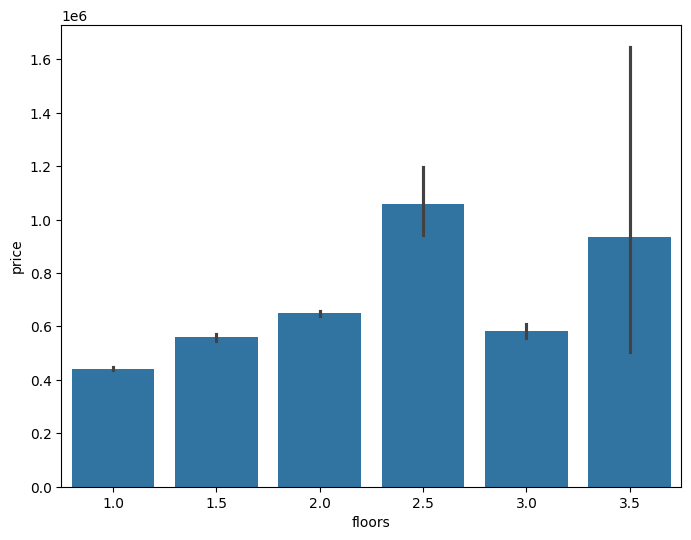

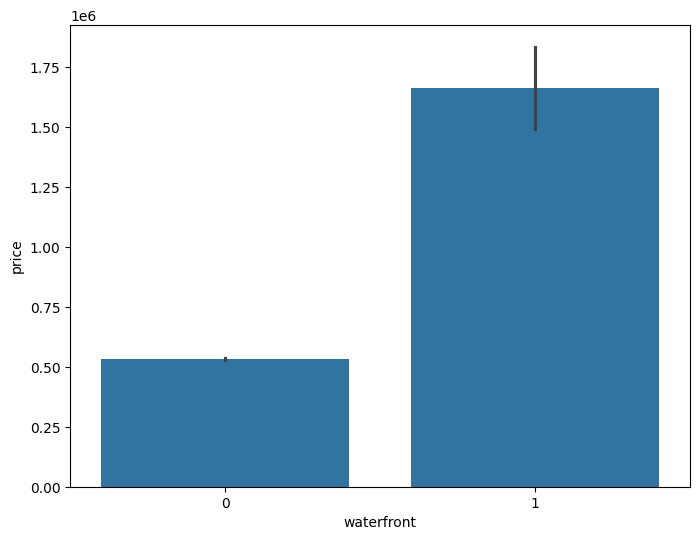

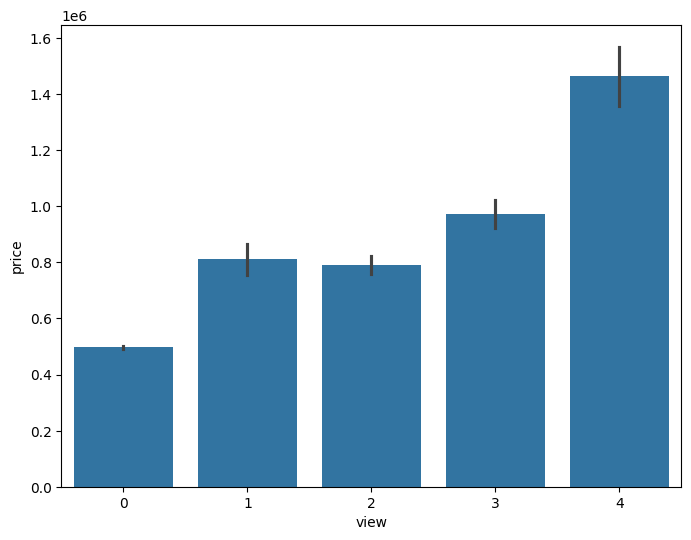

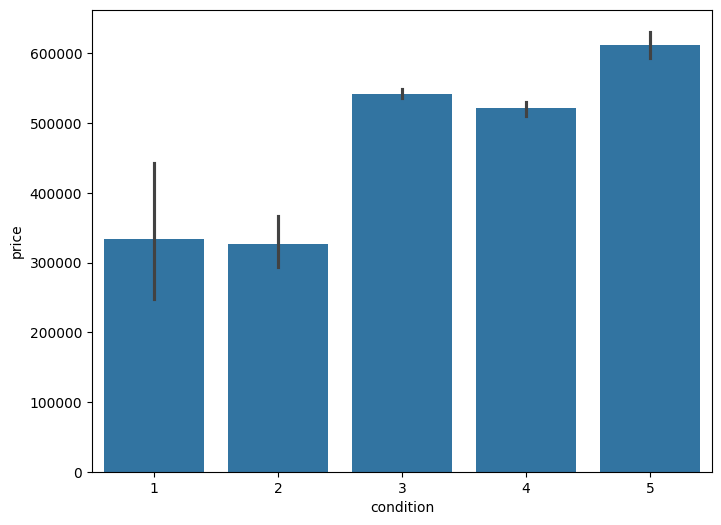

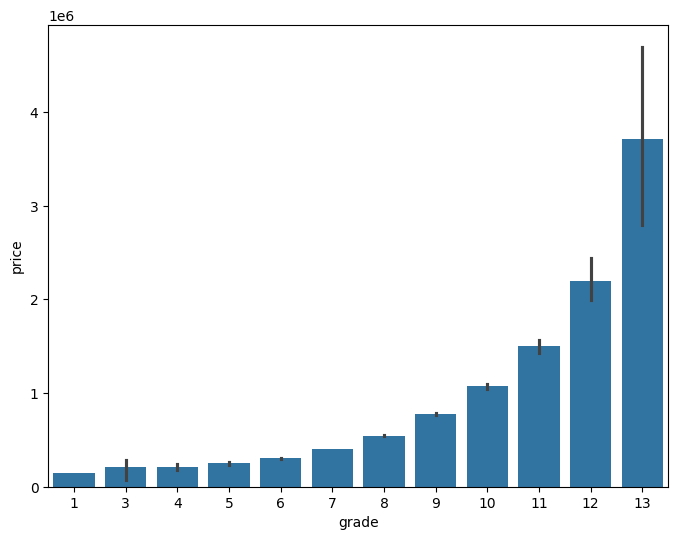

In [17]:
for col in numeric_data[['floors','waterfront', 'view', 'condition', 'grade']]:
  plt.figure(figsize=(8,6))
  sns.barplot(x=col,y='price',data=numeric_data)

In [18]:
from scipy import stats

In [19]:
for col in numeric_data.columns:
  pearson_coef,p_value=stats.pearsonr(df[col],df['price'])
  #print(f'{col}   pearson_coef    ',pearson_coef,'       with p_value     ',p_value)
  print(f"{col:<20} | Pearson Coef: {pearson_coef:<10.4f} | p-value: {p_value:<10.4f}")

price                | Pearson Coef: 1.0000     | p-value: 0.0000    
bedrooms             | Pearson Coef: 0.3088     | p-value: 0.0000    
bathrooms            | Pearson Coef: 0.5257     | p-value: 0.0000    
sqft_living          | Pearson Coef: 0.7020     | p-value: 0.0000    
sqft_lot             | Pearson Coef: 0.0897     | p-value: 0.0000    
floors               | Pearson Coef: 0.2568     | p-value: 0.0000    
waterfront           | Pearson Coef: 0.2664     | p-value: 0.0000    
view                 | Pearson Coef: 0.3973     | p-value: 0.0000    
condition            | Pearson Coef: 0.0364     | p-value: 0.0000    
grade                | Pearson Coef: 0.6674     | p-value: 0.0000    
sqft_above           | Pearson Coef: 0.6056     | p-value: 0.0000    
sqft_basement        | Pearson Coef: 0.3238     | p-value: 0.0000    
yr_built             | Pearson Coef: 0.0540     | p-value: 0.0000    
yr_renovated         | Pearson Coef: 0.1264     | p-value: 0.0000    
zipcode             

# Model Development


From above analysis we find below features are good predictors of price.

In [20]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]

In [21]:
x=df[features]
y=df['price']

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [24]:
linear=LinearRegression()
ridge=Ridge()
lasso=Lasso()
random=RandomForestRegressor()
decision=DecisionTreeRegressor()

In [25]:
linear.fit(x_train,y_train)

LinearRegression()

In [26]:
ridge.fit(x_train,y_train)

Ridge()

In [27]:
random.fit(x_train,y_train)

RandomForestRegressor()

In [28]:
decision.fit(x_train,y_train)

DecisionTreeRegressor()

In [29]:
print("Train Score:")
print("LinearRegression:",linear.score(x_train,y_train))
print("Ridge:",ridge.score(x_train,y_train))
print("RandomForestRegressor:",random.score(x_train,y_train))
print("DecisionTreeRegressor:",decision.score(x_train,y_train))

Train Score:
LinearRegression: 0.6564450189198034
Ridge: 0.6564429442735156
RandomForestRegressor: 0.9734027778032224
DecisionTreeRegressor: 0.9992247658840684


In [30]:
print("Test Score:")
print("LinearRegression:",linear.score(x_test,y_test))
print("Ridge:",ridge.score(x_test,y_test))
print("RandomForestRegressor:",random.score(x_test,y_test))
print("DecisionTreeRegressor:",decision.score(x_test,y_test))

Test Score:
LinearRegression: 0.661402943173262
Ridge: 0.661354987240599
RandomForestRegressor: 0.7804037661426239
DecisionTreeRegressor: 0.6049688602186538


In [31]:
print("Test R score:")
print("LinearRegression:",r2_score(y_test,linear.predict(x_test)))
print("Ridge:",r2_score(y_test,ridge.predict(x_test)))
print("RandomForestRegressor:",r2_score(y_test,random.predict(x_test)))
print("DecisionTreeRegressor:",r2_score(y_test,decision.predict(x_test)))

Test R score:
LinearRegression: 0.661402943173262
Ridge: 0.661354987240599
RandomForestRegressor: 0.7804037661426239
DecisionTreeRegressor: 0.6049688602186538


In [32]:
print("Test R score:")
print("LinearRegression:",r2_score(y_test,linear.predict(x_test)))
print("Ridge:",r2_score(y_test,ridge.predict(x_test)))
print("RandomForestRegressor:",r2_score(y_test,random.predict(x_test)))
print("DecisionTreeRegressor:",r2_score(y_test,decision.predict(x_test)))

Test R score:
LinearRegression: 0.661402943173262
Ridge: 0.661354987240599
RandomForestRegressor: 0.7804037661426239
DecisionTreeRegressor: 0.6049688602186538


# Model Evaluation and Refinement


In [33]:
from sklearn.model_selection import cross_val_score

In [34]:
scores = cross_val_score(LinearRegression(), x_train, y_train, cv=5, scoring='r2')
print("Cross-validated R² scores:", scores)
print("Average R²:", scores.mean())

Cross-validated R² scores: [0.63736797 0.64090679 0.67660985 0.67558063 0.64720931]
Average R²: 0.6555349115238478


In [35]:
scores = cross_val_score(Ridge(), x_train, y_train, cv=5, scoring='r2')
print("Cross-validated R² scores:", scores)
print("Average R²:", scores.mean())

Cross-validated R² scores: [0.6372845  0.64098427 0.67660472 0.67555912 0.64724473]
Average R²: 0.6555354688206321


In [36]:
scores = cross_val_score(RandomForestRegressor(), x_train, y_train, cv=5, scoring='r2')
print("Cross-validated R² scores:", scores)
print("Average R²:", scores.mean())

Cross-validated R² scores: [0.81154081 0.82005335 0.82231137 0.82993663 0.80699186]
Average R²: 0.8181668020990444


In [37]:
scores = cross_val_score(DecisionTreeRegressor(), x_train, y_train, cv=5, scoring='r2')
print("Cross-validated R² scores:", scores)
print("Average R²:", scores.mean())

Cross-validated R² scores: [0.65274797 0.63500569 0.65363776 0.66732551 0.58451774]
Average R²: 0.6386469319152666


In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
param_grid={'n_estimators':[1,100,10],
            'max_depth':[1,20,2],
            'min_samples_split':[2,5],
            'min_samples_leaf':[1,2]
            }


In [40]:
grid_search=GridSearchCV(estimator=RandomForestRegressor(),param_grid=param_grid,cv=5,scoring='neg_mean_squared_error',verbose=2,n_jobs=-1)
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [1, 20, 2], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [1, 100, 10]},
             scoring='neg_mean_squared_error', verbose=2)

In [41]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [42]:
best_model = grid_search.best_estimator_
best_model.fit(x_train, y_train)

RandomForestRegressor(max_depth=20)

In [43]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = best_model.predict(x_test)
print("Test MSE:", mean_squared_error(y_test, y_pred))
print("Test R² Score:", r2_score(y_test, y_pred))

Test MSE: 33579744946.966213
Test R² Score: 0.7778775285844781


In [44]:
import joblib
joblib.dump(best_model, 'House Price prediction_model.pkl')

['House Price prediction_model.pkl']